# Euro 2024 Game Passes Analysis Overview

This analysis focuses on understanding the passing patterns of teams in a selected match, providing insights into the effectiveness and accuracy of passes. It highlights key aspects such as successful passes, pass locations, and overall team performance.

## 1. Total Passes Breakdown
We examine the total number of passes made by each team during the match, with a breakdown into:
- **Successful Passes**: Passes that reached the intended target.
- **Unsuccessful Passes**: Passes that were intercepted or misplaced.

This breakdown helps identify how effectively teams maintained possession and distributed the ball across different areas of the pitch.

## 2. Passes Map Visualization
A pitch map is used to display the location of passes for both teams, color-coded based on their success:
- **Green**: Successful passes.
- **Red**: Unsuccessful passes.

This visualization provides insights into passing networks, the zones where teams were able to dominate possession, and areas where passes were frequently intercepted or misplaced.

## 3. Key Passing Insights
By analyzing the passing data, we can determine:
- **Passing accuracy** for each team.
- The **distribution of passes** across different areas of the pitch (e.g., attacking third, midfield).
- **Key playmakers** who were central to their team's passing strategy.

This analysis gives a detailed understanding of each team's passing performance, highlighting strengths and areas for improvement in ball distribution.


## Import Libraries

In [1]:
from statsbombpy import sb
import pandas as pd
import numpy as np
#from mplsoccer import Pitch
from mplsoccer import VerticalPitch,Pitch
from mplsoccer.pitch import Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import math
import matplotlib.patheffects as path_effects
import plotly.graph_objects as go
pd.set_option("display.max_columns", None)

### Euro 2024 Competition

In [2]:
#call the statsbombpy API to get a list of matches for a given competition
euro_2024_matches = sb.matches(competition_id=55, season_id=282)

#print the first 5 matches listed
euro_2024_matches.head(5)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,available,2024-07-15T07:54:23.583297,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,available,2024-07-15T15:48:50.315500,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
2,3942752,2024-07-09,22:00:00.000,Europe - UEFA Euro,2024,Spain,France,2,1,available,available,2024-07-10T08:51:07.032303,2024-07-10T13:01:26.597509,6,Semi-finals,Allianz Arena,Slavko Vinčić,Luis de la Fuente Castillo,Didier Deschamps,1.1.0,2,2
3,3942382,2024-07-06,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,Turkey,2,1,available,available,2024-07-10T06:50:04.068615,2024-07-10T06:56:35.146850,5,Quarter-finals,Olympiastadion Berlin,Clément Turpin,Ronald Koeman,Vincenzo Montella,1.1.0,2,2
4,3942349,2024-07-05,22:00:00.000,Europe - UEFA Euro,2024,Portugal,France,0,0,available,available,2024-07-12T01:57:15.210934,2024-07-12T02:00:16.871522,5,Quarter-finals,Volksparkstadion,Michael Oliver,Roberto Martínez Montoliú,Didier Deschamps,1.1.0,2,2


## ETL

In [3]:
#concat home and away teams to keep the unique teams that participated to the tournament
home_team = euro_2024_matches['home_team']
away_team = euro_2024_matches['away_team']
teams = pd.concat([home_team,away_team])
teams = pd.DataFrame(teams.drop_duplicates()).reset_index(drop=True)
teams.columns = ['Team']

In [4]:
# give teams colors for the visuals
team_colors = pd.read_excel('Team Colors.xlsx')
teams = teams.merge(team_colors, how='inner', on='Team')

In [5]:
teams.head()

,Team,First_Color,Second_Color
0,Netherlands,#F36C21,#FFFFFF
1,Spain,#8B0D11,#FCB507
2,Portugal,#E42518,#0D6938
3,Denmark,#FCB507,#FFFFFF
4,England,#000040,#FFFFFF


In [6]:
# take all matches in one dataframe
matches = euro_2024_matches.filter(['match_id','match_date','home_team','away_team','competition_stage','home_score','away_score','period'])
matches['match'] = matches['competition_stage'] + ' ' + matches['home_team'] + ' - ' + matches['away_team'] 

In [7]:
matches

,match_id,match_date,home_team,away_team,competition_stage,home_score,away_score,match
0,3942819,2024-07-10,Netherlands,England,Semi-finals,1,2,Semi-finals Netherlands - England
1,3943043,2024-07-14,Spain,England,Final,2,1,Final Spain - England
2,3942752,2024-07-09,Spain,France,Semi-finals,2,1,Semi-finals Spain - France
3,3942382,2024-07-06,Netherlands,Turkey,Quarter-finals,2,1,Quarter-finals Netherlands - Turkey
4,3942349,2024-07-05,Portugal,France,Quarter-finals,0,0,Quarter-finals Portugal - France
5,3930180,2024-06-25,Netherlands,Austria,Group Stage,2,3,Group Stage Netherlands - Austria
6,3930171,2024-06-20,Denmark,England,Group Stage,1,1,Group Stage Denmark - England
7,3942227,2024-07-06,England,Switzerland,Quarter-finals,1,1,Quarter-finals England - Switzerland
8,3942226,2024-07-05,Spain,Germany,Quarter-finals,2,1,Quarter-finals Spain - Germany
9,3938645,2024-06-26,Ukraine,Belgium,Group Stage,0,0,Group Stage Ukraine - Belgium


In [8]:
# functions fore retreiving match data

# retrieve the prefered Match ID
def take_matchid(df, value):
    match = df[df['match'] == value]
    if not match.empty:
        return match['match_id'].iloc[0]
    else:
        return None  # or handle it as you need

# select the match that you want 
def teams_selected(df,value):
    df_details = df[df.match == value]
    return df_details

In [9]:
# choose a match from table (matches) and column (match)
match_selector = 'Final Spain - England'

In [10]:
# call the statsbombpy events API to bring in the event data for the match using the function and the string match_selector
match = sb.events(match_id=take_matchid(matches,match_selector))

In [11]:
match.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50aa204f-5d65-4145-8597-5d5628fb7898,1,NaN,NaN,NaN,3943043,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Spain,772,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Spain,772,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a279cbee-9ab3-4cfb-9c51-27cacc1bf2a2,2,NaN,NaN,NaN,3943043,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Spain,772,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",England,768,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d2126e70-9f04-4bb7-ba2b-9377836d1757,3,NaN,NaN,NaN,3943043,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Spain,772,[54d78bfa-4146-42bd-acdc-97bcd393dd81],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54d78bfa-4146-42bd-acdc-97bcd393dd81,4,NaN,NaN,NaN,3943043,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Spain,772,[d2126e70-9f04-4bb7-ba2b-9377836d1757],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain,772,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7230470a-8ceb-4eb8-a66f-d72a2afb12d6,1706,NaN,NaN,NaN,3943043,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Regular Play,NaN,NaN,NaN,79,Spain,772,[cb9ba06c-a673-448d-ab21-755d330fcadc],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN


In [12]:
# retieve the general info of the match using again the other function and the match selector
match_details = teams_selected(matches,match_selector)

In [13]:
match_details

,match_id,match_date,home_team,away_team,competition_stage,home_score,away_score,match
1,3943043,2024-07-14,Spain,England,Final,2,1,Final Spain - England


## Passes Analysis

In [54]:
# keep only the necessary columns
event_pass = match[['minute', 'second', 'team', 'location', 'period', 'type', 'pass_outcome', 'player', 'position', 'pass_end_location']]

In [55]:
event_pass.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Miscontrol', 'Block', 'Dispossessed', 'Duel',
       'Dribble', 'Ball Recovery', 'Clearance', 'Interception',
       'Dribbled Past', 'Foul Committed', 'Foul Won', 'Shot',
       'Goal Keeper', 'Injury Stoppage', 'Referee Ball-Drop', '50/50',
       'Half End', 'Substitution', 'Shield', 'Tactical Shift', 'Error'],
      dtype=object)

In [56]:
event_pass.pass_outcome.unique()

array([nan, 'Out', 'Incomplete', 'Unknown', 'Pass Offside'], dtype=object)

In [57]:
event_pass.player.unique()

array([nan, 'Kobbie Mainoo', 'Jordan Pickford', 'Unai Simón Mendibil',
       'Robin Aime Robert Le Normand', 'Daniel Carvajal Ramos',
       'Álvaro Borja Morata Martín', 'Daniel Olmo Carvajal',
       'Jude Bellingham', 'Rodrigo Hernández Cascante', 'Aymeric Laporte',
       'Luke Shaw', 'Declan Rice', 'Marc Guehi', 'Phil Foden',
       'Kyle Walker', 'Lamine Yamal Nasraoui Ebana',
       'Marc Cucurella Saseta', 'Nicholas Williams Arthuer', 'Harry Kane',
       'Bukayo Saka', 'Fabián Ruiz Peña', 'John Stones',
       'Martín Zubimendi Ibáñez', 'Cole Palmer', 'Mikel Oyarzabal Ugarte',
       'José Ignacio Fernández Iglesias', 'Ollie Watkins', 'Ivan Toney',
       'Mikel Merino Zazón'], dtype=object)

In [58]:
# filter for Spain
event_pass_home=event_pass[event_pass['team']==str(match_details['home_team'].iloc[0])]
event_pass_home

,minute,second,team,location,period,type,pass_outcome,player,position,pass_end_location
0,0,0,Spain,NaN,1,Starting XI,NaN,NaN,NaN,NaN
3,0,0,Spain,NaN,1,Half Start,NaN,NaN,NaN,NaN
5,45,0,Spain,NaN,2,Half Start,NaN,NaN,NaN,NaN
8,0,34,Spain,"[6.9, 39.6]",1,Pass,NaN,Unai Simón Mendibil,Goalkeeper,"[9.1, 57.2]"
9,0,36,Spain,"[8.9, 57.2]",1,Pass,NaN,Robin Aime Robert Le Normand,Right Center Back,"[20.6, 75.8]"
...,...,...,...,...,...,...,...,...,...,...
3303,82,38,Spain,NaN,2,Substitution,NaN,Robin Aime Robert Le Normand,Right Center Back,NaN
3304,88,40,Spain,NaN,2,Substitution,NaN,Lamine Yamal Nasraoui Ebana,Right Wing,NaN
3306,49,52,Spain,"[5.4, 63.8]",2,Shield,NaN,Daniel Carvajal Ramos,Right Back,NaN
3310,89,54,Spain,NaN,2,Tactical Shift,NaN,NaN,NaN,NaN


In [59]:
# Add the passer and the recipient columns
event_pass_home['passer'] = event_pass_home['player']
event_pass_home['recipient'] = event_pass_home['player'].shift(-1)

C:\Users\gsylas\AppData\Local\Temp\ipykernel_4308\2069500047.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gsylas\AppData\Local\Temp\ipykernel_4308\2069500047.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
event_pass_home.head()

,minute,second,team,location,period,type,pass_outcome,player,position,pass_end_location,passer,recipient
0,0,0,Spain,NaN,1,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,Spain,NaN,1,Half Start,NaN,NaN,NaN,NaN,NaN,NaN
5,45,0,Spain,NaN,2,Half Start,NaN,NaN,NaN,NaN,NaN,Unai Simón Mendibil
8,0,34,Spain,"[6.9, 39.6]",1,Pass,NaN,Unai Simón Mendibil,Goalkeeper,"[9.1, 57.2]",Unai Simón Mendibil,Robin Aime Robert Le Normand
9,0,36,Spain,"[8.9, 57.2]",1,Pass,NaN,Robin Aime Robert Le Normand,Right Center Back,"[20.6, 75.8]",Robin Aime Robert Le Normand,Daniel Carvajal Ramos


In [61]:
passes_home = event_pass_home[event_pass_home['type'] == 'Pass']
passes_home

,minute,second,team,location,period,type,pass_outcome,player,position,pass_end_location,passer,recipient
8,0,34,Spain,"[6.9, 39.6]",1,Pass,NaN,Unai Simón Mendibil,Goalkeeper,"[9.1, 57.2]",Unai Simón Mendibil,Robin Aime Robert Le Normand
9,0,36,Spain,"[8.9, 57.2]",1,Pass,NaN,Robin Aime Robert Le Normand,Right Center Back,"[20.6, 75.8]",Robin Aime Robert Le Normand,Daniel Carvajal Ramos
10,0,39,Spain,"[28.6, 76.4]",1,Pass,NaN,Daniel Carvajal Ramos,Right Back,"[50.2, 68.5]",Daniel Carvajal Ramos,Álvaro Borja Morata Martín
11,0,41,Spain,"[61.9, 67.1]",1,Pass,Incomplete,Álvaro Borja Morata Martín,Center Forward,"[65.1, 66.9]",Álvaro Borja Morata Martín,Daniel Carvajal Ramos
12,0,56,Spain,"[72.5, 80.0]",1,Pass,NaN,Daniel Carvajal Ramos,Right Back,"[70.4, 73.3]",Daniel Carvajal Ramos,Daniel Olmo Carvajal
...,...,...,...,...,...,...,...,...,...,...,...,...
912,90,25,Spain,"[38.6, 80.0]",2,Pass,NaN,Daniel Carvajal Ramos,Right Back,"[79.8, 74.7]",Daniel Carvajal Ramos,Mikel Oyarzabal Ugarte
913,90,28,Spain,"[82.5, 75.3]",2,Pass,Out,Mikel Oyarzabal Ugarte,Center Forward,"[120.0, 67.0]",Mikel Oyarzabal Ugarte,Unai Simón Mendibil
916,91,55,Spain,"[26.1, 21.1]",2,Pass,Incomplete,Unai Simón Mendibil,Goalkeeper,"[81.1, 32.0]",Unai Simón Mendibil,Aymeric Laporte
919,92,2,Spain,"[47.9, 27.7]",2,Pass,Incomplete,Aymeric Laporte,Left Center Back,"[70.9, 24.1]",Aymeric Laporte,Unai Simón Mendibil


In [62]:
# Successful passes
successful_home = passes_home[passes_home['pass_outcome'].isnull()]
successful_home

,minute,second,team,location,period,type,pass_outcome,player,position,pass_end_location,passer,recipient
8,0,34,Spain,"[6.9, 39.6]",1,Pass,NaN,Unai Simón Mendibil,Goalkeeper,"[9.1, 57.2]",Unai Simón Mendibil,Robin Aime Robert Le Normand
9,0,36,Spain,"[8.9, 57.2]",1,Pass,NaN,Robin Aime Robert Le Normand,Right Center Back,"[20.6, 75.8]",Robin Aime Robert Le Normand,Daniel Carvajal Ramos
10,0,39,Spain,"[28.6, 76.4]",1,Pass,NaN,Daniel Carvajal Ramos,Right Back,"[50.2, 68.5]",Daniel Carvajal Ramos,Álvaro Borja Morata Martín
12,0,56,Spain,"[72.5, 80.0]",1,Pass,NaN,Daniel Carvajal Ramos,Right Back,"[70.4, 73.3]",Daniel Carvajal Ramos,Daniel Olmo Carvajal
13,0,58,Spain,"[70.4, 73.3]",1,Pass,NaN,Daniel Olmo Carvajal,Center Attacking Midfield,"[71.0, 78.3]",Daniel Olmo Carvajal,Daniel Olmo Carvajal
...,...,...,...,...,...,...,...,...,...,...,...,...
898,85,49,Spain,"[52.6, 46.6]",2,Pass,NaN,Fabián Ruiz Peña,Left Defensive Midfield,"[63.4, 34.9]",Fabián Ruiz Peña,Daniel Olmo Carvajal
899,85,52,Spain,"[70.7, 33.6]",2,Pass,NaN,Daniel Olmo Carvajal,Center Attacking Midfield,"[88.2, 39.9]",Daniel Olmo Carvajal,Mikel Oyarzabal Ugarte
900,85,53,Spain,"[88.9, 37.8]",2,Pass,NaN,Mikel Oyarzabal Ugarte,Center Forward,"[99.7, 12.7]",Mikel Oyarzabal Ugarte,Marc Cucurella Saseta
901,85,55,Spain,"[100.0, 12.7]",2,Pass,NaN,Marc Cucurella Saseta,Left Back,"[111.2, 36.3]",Marc Cucurella Saseta,Martín Zubimendi Ibáñez


In [63]:
# Check whether no NaNs are present
sum(successful_home.recipient.isnull()+1)

518

In [64]:
# Pass network before the first substitution takes place
subs_home = event_pass_home[event_pass_home['type']=='Substitution']
subs_home

,minute,second,team,location,period,type,pass_outcome,player,position,pass_end_location,passer,recipient
3299,45,0,Spain,NaN,2,Substitution,NaN,Rodrigo Hernández Cascante,Right Defensive Midfield,NaN,Rodrigo Hernández Cascante,Álvaro Borja Morata Martín
3301,67,19,Spain,NaN,2,Substitution,NaN,Álvaro Borja Morata Martín,Center Forward,NaN,Álvaro Borja Morata Martín,Robin Aime Robert Le Normand
3303,82,38,Spain,NaN,2,Substitution,NaN,Robin Aime Robert Le Normand,Right Center Back,NaN,Robin Aime Robert Le Normand,Lamine Yamal Nasraoui Ebana
3304,88,40,Spain,NaN,2,Substitution,NaN,Lamine Yamal Nasraoui Ebana,Right Wing,NaN,Lamine Yamal Nasraoui Ebana,Daniel Carvajal Ramos


In [65]:
# Time when the first substituion took place
first_sub_home_minute = subs_home['minute'].min()
first_sub_home_minute_df = subs_home[subs_home['minute'] == first_sub_home_minute]
first_sub_home_second = first_sub_home_minute_df['second'].min()
int(first_sub_home_minute), int(first_sub_home_second)

(45, 0)

In [66]:
# Filter oute the data for generating pass network before the first substitution takes place
successful_home = successful_home[(successful_home['minute']<=first_sub_home_minute-1) ] # & (successful_Spain['second']<=first_sub_Spain_second)
successful_home

,minute,second,team,location,period,type,pass_outcome,player,position,pass_end_location,passer,recipient
8,0,34,Spain,"[6.9, 39.6]",1,Pass,NaN,Unai Simón Mendibil,Goalkeeper,"[9.1, 57.2]",Unai Simón Mendibil,Robin Aime Robert Le Normand
9,0,36,Spain,"[8.9, 57.2]",1,Pass,NaN,Robin Aime Robert Le Normand,Right Center Back,"[20.6, 75.8]",Robin Aime Robert Le Normand,Daniel Carvajal Ramos
10,0,39,Spain,"[28.6, 76.4]",1,Pass,NaN,Daniel Carvajal Ramos,Right Back,"[50.2, 68.5]",Daniel Carvajal Ramos,Álvaro Borja Morata Martín
12,0,56,Spain,"[72.5, 80.0]",1,Pass,NaN,Daniel Carvajal Ramos,Right Back,"[70.4, 73.3]",Daniel Carvajal Ramos,Daniel Olmo Carvajal
13,0,58,Spain,"[70.4, 73.3]",1,Pass,NaN,Daniel Olmo Carvajal,Center Attacking Midfield,"[71.0, 78.3]",Daniel Olmo Carvajal,Daniel Olmo Carvajal
...,...,...,...,...,...,...,...,...,...,...,...,...
467,42,7,Spain,"[12.9, 44.4]",1,Pass,NaN,Unai Simón Mendibil,Goalkeeper,"[28.6, 58.1]",Unai Simón Mendibil,Robin Aime Robert Le Normand
468,42,10,Spain,"[26.8, 58.1]",1,Pass,NaN,Robin Aime Robert Le Normand,Right Center Back,"[34.1, 26.7]",Robin Aime Robert Le Normand,Aymeric Laporte
469,42,19,Spain,"[73.3, 17.5]",1,Pass,NaN,Aymeric Laporte,Left Center Back,"[106.0, 24.5]",Aymeric Laporte,Nicholas Williams Arthuer
473,43,53,Spain,"[28.8, 24.9]",1,Pass,NaN,Rodrigo Hernández Cascante,Right Defensive Midfield,"[26.6, 38.7]",Rodrigo Hernández Cascante,Robin Aime Robert Le Normand


In [67]:
successful_home.player.nunique()

11

In [68]:
pass_loc_home = successful_home['location']
pass_loc_home = pd.DataFrame(pass_loc_home.to_list(), columns=['x', 'y'])
pass_end_loc_home = successful_home['pass_end_location']
pass_end_loc_home = pd.DataFrame(pass_end_loc_home.to_list(), columns=['end_x', 'end_y'])
pass_end_loc_home

,end_x,end_y
0,9.1,57.2
1,20.6,75.8
2,50.2,68.5
3,70.4,73.3
4,71.0,78.3
...,...,...
273,28.6,58.1
274,34.1,26.7
275,106.0,24.5
276,26.6,38.7


In [69]:
successful_home=successful_home.reset_index()
successful_home['x'] = pass_loc_home['x']
successful_home['y'] = pass_loc_home['y']
successful_home['end_x'] = pass_end_loc_home['end_x']
successful_home['end_y'] = pass_end_loc_home['end_y']
successful_home

,index,minute,second,team,location,period,type,pass_outcome,player,position,pass_end_location,passer,recipient,x,y,end_x,end_y
0,8,0,34,Spain,"[6.9, 39.6]",1,Pass,NaN,Unai Simón Mendibil,Goalkeeper,"[9.1, 57.2]",Unai Simón Mendibil,Robin Aime Robert Le Normand,6.9,39.6,9.1,57.2
1,9,0,36,Spain,"[8.9, 57.2]",1,Pass,NaN,Robin Aime Robert Le Normand,Right Center Back,"[20.6, 75.8]",Robin Aime Robert Le Normand,Daniel Carvajal Ramos,8.9,57.2,20.6,75.8
2,10,0,39,Spain,"[28.6, 76.4]",1,Pass,NaN,Daniel Carvajal Ramos,Right Back,"[50.2, 68.5]",Daniel Carvajal Ramos,Álvaro Borja Morata Martín,28.6,76.4,50.2,68.5
3,12,0,56,Spain,"[72.5, 80.0]",1,Pass,NaN,Daniel Carvajal Ramos,Right Back,"[70.4, 73.3]",Daniel Carvajal Ramos,Daniel Olmo Carvajal,72.5,80.0,70.4,73.3
4,13,0,58,Spain,"[70.4, 73.3]",1,Pass,NaN,Daniel Olmo Carvajal,Center Attacking Midfield,"[71.0, 78.3]",Daniel Olmo Carvajal,Daniel Olmo Carvajal,70.4,73.3,71.0,78.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,467,42,7,Spain,"[12.9, 44.4]",1,Pass,NaN,Unai Simón Mendibil,Goalkeeper,"[28.6, 58.1]",Unai Simón Mendibil,Robin Aime Robert Le Normand,12.9,44.4,28.6,58.1
274,468,42,10,Spain,"[26.8, 58.1]",1,Pass,NaN,Robin Aime Robert Le Normand,Right Center Back,"[34.1, 26.7]",Robin Aime Robert Le Normand,Aymeric Laporte,26.8,58.1,34.1,26.7
275,469,42,19,Spain,"[73.3, 17.5]",1,Pass,NaN,Aymeric Laporte,Left Center Back,"[106.0, 24.5]",Aymeric Laporte,Nicholas Williams Arthuer,73.3,17.5,106.0,24.5
276,473,43,53,Spain,"[28.8, 24.9]",1,Pass,NaN,Rodrigo Hernández Cascante,Right Defensive Midfield,"[26.6, 38.7]",Rodrigo Hernández Cascante,Robin Aime Robert Le Normand,28.8,24.9,26.6,38.7


In [70]:
del successful_home['location']
del successful_home['pass_end_location']
successful_home

,index,minute,second,team,period,type,pass_outcome,player,position,passer,recipient,x,y,end_x,end_y
0,8,0,34,Spain,1,Pass,NaN,Unai Simón Mendibil,Goalkeeper,Unai Simón Mendibil,Robin Aime Robert Le Normand,6.9,39.6,9.1,57.2
1,9,0,36,Spain,1,Pass,NaN,Robin Aime Robert Le Normand,Right Center Back,Robin Aime Robert Le Normand,Daniel Carvajal Ramos,8.9,57.2,20.6,75.8
2,10,0,39,Spain,1,Pass,NaN,Daniel Carvajal Ramos,Right Back,Daniel Carvajal Ramos,Álvaro Borja Morata Martín,28.6,76.4,50.2,68.5
3,12,0,56,Spain,1,Pass,NaN,Daniel Carvajal Ramos,Right Back,Daniel Carvajal Ramos,Daniel Olmo Carvajal,72.5,80.0,70.4,73.3
4,13,0,58,Spain,1,Pass,NaN,Daniel Olmo Carvajal,Center Attacking Midfield,Daniel Olmo Carvajal,Daniel Olmo Carvajal,70.4,73.3,71.0,78.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,467,42,7,Spain,1,Pass,NaN,Unai Simón Mendibil,Goalkeeper,Unai Simón Mendibil,Robin Aime Robert Le Normand,12.9,44.4,28.6,58.1
274,468,42,10,Spain,1,Pass,NaN,Robin Aime Robert Le Normand,Right Center Back,Robin Aime Robert Le Normand,Aymeric Laporte,26.8,58.1,34.1,26.7
275,469,42,19,Spain,1,Pass,NaN,Aymeric Laporte,Left Center Back,Aymeric Laporte,Nicholas Williams Arthuer,73.3,17.5,106.0,24.5
276,473,43,53,Spain,1,Pass,NaN,Rodrigo Hernández Cascante,Right Defensive Midfield,Rodrigo Hernández Cascante,Robin Aime Robert Le Normand,28.8,24.9,26.6,38.7


In [71]:
successful_home['pass_outcome'] = 'successful'
successful_home

,index,minute,second,team,period,type,pass_outcome,player,position,passer,recipient,x,y,end_x,end_y
0,8,0,34,Spain,1,Pass,successful,Unai Simón Mendibil,Goalkeeper,Unai Simón Mendibil,Robin Aime Robert Le Normand,6.9,39.6,9.1,57.2
1,9,0,36,Spain,1,Pass,successful,Robin Aime Robert Le Normand,Right Center Back,Robin Aime Robert Le Normand,Daniel Carvajal Ramos,8.9,57.2,20.6,75.8
2,10,0,39,Spain,1,Pass,successful,Daniel Carvajal Ramos,Right Back,Daniel Carvajal Ramos,Álvaro Borja Morata Martín,28.6,76.4,50.2,68.5
3,12,0,56,Spain,1,Pass,successful,Daniel Carvajal Ramos,Right Back,Daniel Carvajal Ramos,Daniel Olmo Carvajal,72.5,80.0,70.4,73.3
4,13,0,58,Spain,1,Pass,successful,Daniel Olmo Carvajal,Center Attacking Midfield,Daniel Olmo Carvajal,Daniel Olmo Carvajal,70.4,73.3,71.0,78.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,467,42,7,Spain,1,Pass,successful,Unai Simón Mendibil,Goalkeeper,Unai Simón Mendibil,Robin Aime Robert Le Normand,12.9,44.4,28.6,58.1
274,468,42,10,Spain,1,Pass,successful,Robin Aime Robert Le Normand,Right Center Back,Robin Aime Robert Le Normand,Aymeric Laporte,26.8,58.1,34.1,26.7
275,469,42,19,Spain,1,Pass,successful,Aymeric Laporte,Left Center Back,Aymeric Laporte,Nicholas Williams Arthuer,73.3,17.5,106.0,24.5
276,473,43,53,Spain,1,Pass,successful,Rodrigo Hernández Cascante,Right Defensive Midfield,Rodrigo Hernández Cascante,Robin Aime Robert Le Normand,28.8,24.9,26.6,38.7


In [72]:
# find the average locations of the passer
avg_loc_home = successful_home.groupby('passer').agg({'x':['mean'], 'y': ['mean', 'count']})
avg_loc_home

x          y      
                                   mean       mean count
passer                                                  
Aymeric Laporte               53.812500  24.739583    48
Daniel Carvajal Ramos         60.105556  72.511111    36
Daniel Olmo Carvajal          72.290000  44.300000    10
Fabián Ruiz Peña              69.620833  25.362500    24
Lamine Yamal Nasraoui Ebana   86.983333  63.266667    12
Marc Cucurella Saseta         70.966667  11.341667    24
Nicholas Williams Arthuer     85.030435  25.682609    23
Robin Aime Robert Le Normand  47.241667  55.627083    48
Rodrigo Hernández Cascante    63.096552  37.324138    29
Unai Simón Mendibil           12.275000  41.862500    16
Álvaro Borja Morata Martín    68.562500  31.012500     8

In [73]:
avg_loc_home.columns=['x', 'y', 'count']
avg_loc_home

,x,y,count
passer,,,
Aymeric Laporte,53.812500,24.739583,48
Daniel Carvajal Ramos,60.105556,72.511111,36
Daniel Olmo Carvajal,72.290000,44.300000,10
Fabián Ruiz Peña,69.620833,25.362500,24
Lamine Yamal Nasraoui Ebana,86.983333,63.266667,12
Marc Cucurella Saseta,70.966667,11.341667,24
Nicholas Williams Arthuer,85.030435,25.682609,23
Robin Aime Robert Le Normand,47.241667,55.627083,48
Rodrigo Hernández Cascante,63.096552,37.324138,29


In [74]:
# Number of passes between each player
pass_bet_home = successful_home.groupby(['passer', 'recipient']).index.count().reset_index()

In [75]:
pass_bet_home.rename({'index':'pass_count'}, axis='columns', inplace=True)

In [76]:
pass_bet_home = pass_bet_home.merge(avg_loc_home, left_on = 'passer', right_index=True)

In [77]:
pass_bet_home = pass_bet_home.merge(avg_loc_home, left_on = 'recipient', right_index=True, suffixes=['', '_end'])

## Pass Network

Text(0.5, 1.0, 'Pass Network of: Spain')

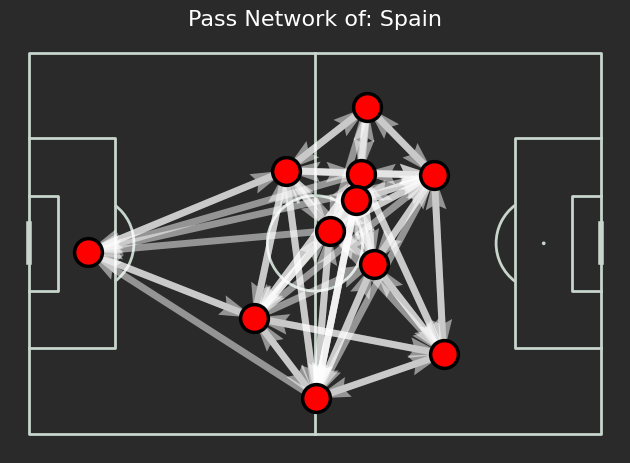

In [79]:
#pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
#              pitch_color='grass', line_color='#c7d5cc', figsize=(13.5, 8),
#              constrained_layout=True, tight_layout=False)
pitch_color = '#2a2a2a'  # Same color as the pitch
line_color = '#c7d5cc'   # Pitch lines color
pitch = Pitch(pitch_type='statsbomb',  pitch_color='#2a2a2a', line_color='#c7d5cc')

fig, ax = pitch.draw()

arrows = pitch.arrows(pass_bet_home.x, pass_bet_home.y, pass_bet_home.x_end, pass_bet_home.y_end, ax=ax, width=5,
                     headwidth=3, color='white', zorder=1, alpha=0.5)
nodes = pitch.scatter(avg_loc_home.x, avg_loc_home.y, s=400, color='red', edgecolors='black', linewidth=2.5, alpha=1, zorder=1, ax=ax)


# Set the background color of the figure to match the pitch
fig.patch.set_facecolor(pitch_color)

ax.set_title('Pass Network of: ' + str(match_details['home_team'].iloc[0]),color = 'white' , size=16)

In [80]:
passes_home

,minute,second,team,location,period,type,pass_outcome,player,position,pass_end_location,passer,recipient
8,0,34,Spain,"[6.9, 39.6]",1,Pass,NaN,Unai Simón Mendibil,Goalkeeper,"[9.1, 57.2]",Unai Simón Mendibil,Robin Aime Robert Le Normand
9,0,36,Spain,"[8.9, 57.2]",1,Pass,NaN,Robin Aime Robert Le Normand,Right Center Back,"[20.6, 75.8]",Robin Aime Robert Le Normand,Daniel Carvajal Ramos
10,0,39,Spain,"[28.6, 76.4]",1,Pass,NaN,Daniel Carvajal Ramos,Right Back,"[50.2, 68.5]",Daniel Carvajal Ramos,Álvaro Borja Morata Martín
11,0,41,Spain,"[61.9, 67.1]",1,Pass,Incomplete,Álvaro Borja Morata Martín,Center Forward,"[65.1, 66.9]",Álvaro Borja Morata Martín,Daniel Carvajal Ramos
12,0,56,Spain,"[72.5, 80.0]",1,Pass,NaN,Daniel Carvajal Ramos,Right Back,"[70.4, 73.3]",Daniel Carvajal Ramos,Daniel Olmo Carvajal
...,...,...,...,...,...,...,...,...,...,...,...,...
912,90,25,Spain,"[38.6, 80.0]",2,Pass,NaN,Daniel Carvajal Ramos,Right Back,"[79.8, 74.7]",Daniel Carvajal Ramos,Mikel Oyarzabal Ugarte
913,90,28,Spain,"[82.5, 75.3]",2,Pass,Out,Mikel Oyarzabal Ugarte,Center Forward,"[120.0, 67.0]",Mikel Oyarzabal Ugarte,Unai Simón Mendibil
916,91,55,Spain,"[26.1, 21.1]",2,Pass,Incomplete,Unai Simón Mendibil,Goalkeeper,"[81.1, 32.0]",Unai Simón Mendibil,Aymeric Laporte
919,92,2,Spain,"[47.9, 27.7]",2,Pass,Incomplete,Aymeric Laporte,Left Center Back,"[70.9, 24.1]",Aymeric Laporte,Unai Simón Mendibil


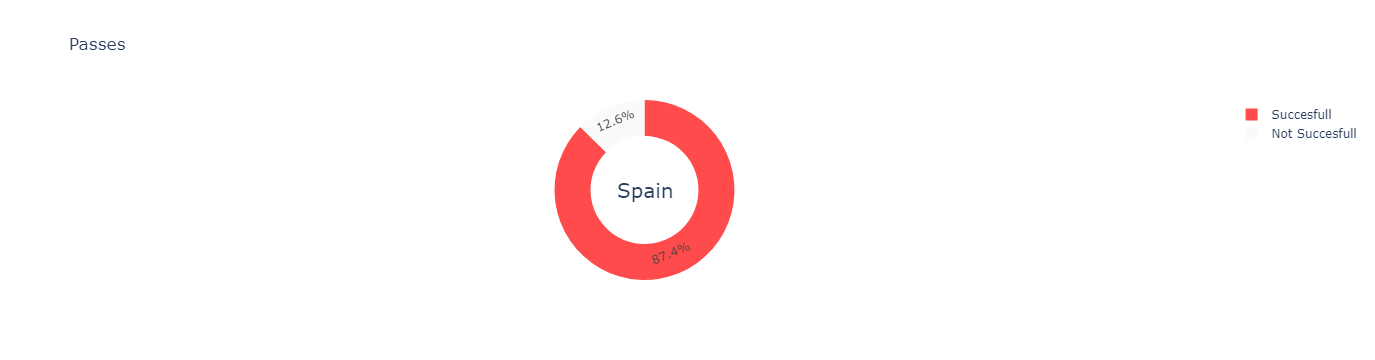

In [82]:
# Team name
team_name = passes_home['team'].iloc[0]
num_passes = len(passes_home)

# Display the team name and the number of shots
#st.write(f"**{team_name} Shots: {num_shots}**")

# Calculate the number of shots on target and off target
succesfull = passes_home[passes_home['pass_outcome'].isna()].shape[0]
not_succesfull = passes_home[~passes_home['pass_outcome'].isna()].shape[0]

# Pie chart for shots distribution (On Target vs Off Target)
labels = ['Succesfull', 'Not Succesfull']
values = [succesfull, not_succesfull]
colors = ['#FF4B4B', '#FAFAFA']

# Create a donut chart using Plotly
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6, marker=dict(colors=colors))])

# Update layout for donut chart
fig.update_layout(
    title_text="Passes",
    annotations=[dict(text=f'{team_name}', x=0.5, y=0.5, font_size=20, showarrow=False)],
    showlegend=True
)

fig.show()

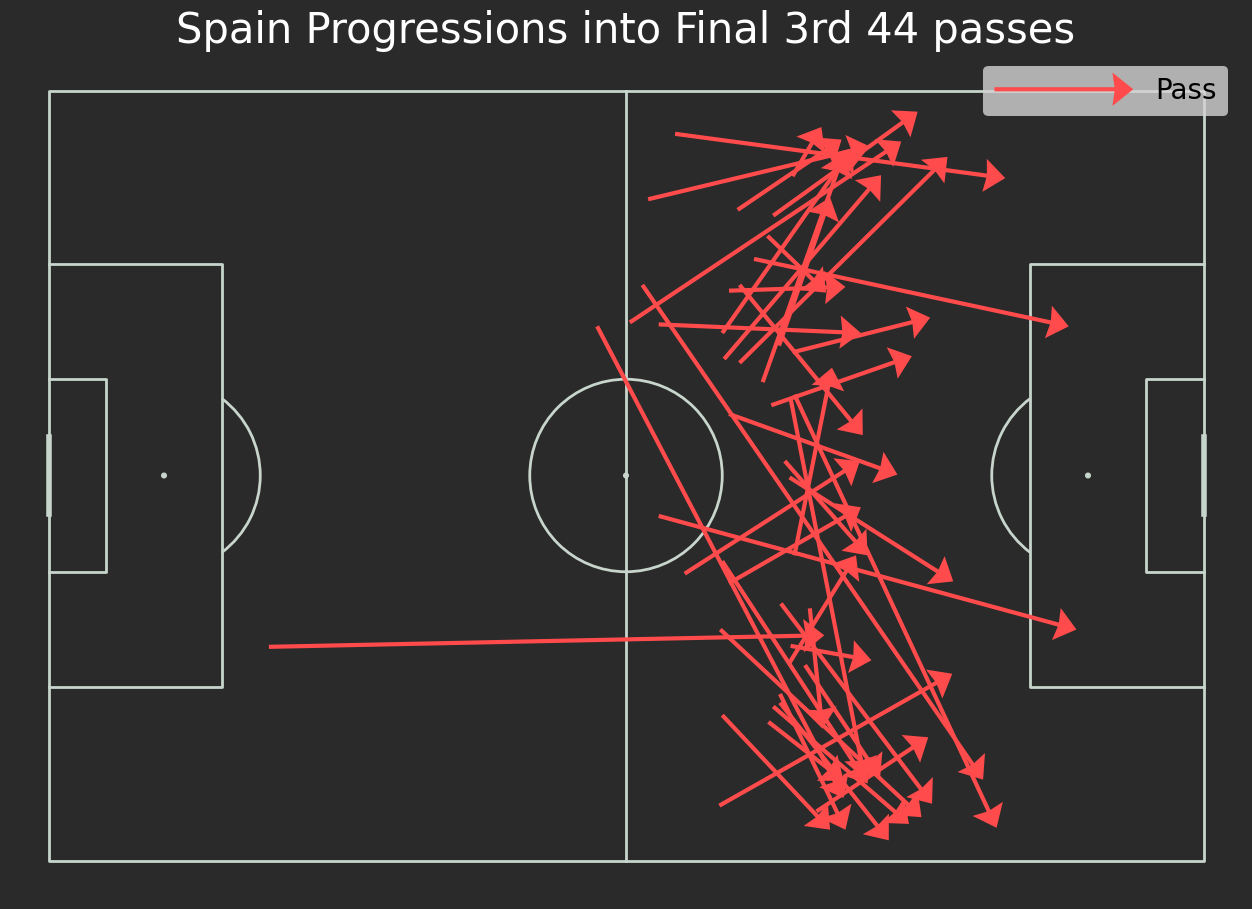

In [83]:
#separate start and end locations from coordinates
match[['x', 'y']] = match['location'].apply(pd.Series)
match[['pass_end_x', 'pass_end_y']] = match['pass_end_location'].apply(pd.Series)
match[['carry_end_x', 'carry_end_y']] = match['carry_end_location'].apply(pd.Series)

#create a variable for the team you want to look into
team=str(match_details['home_team'].iloc[0])


passes_df=match[(match.team==team)&(match.type=="Pass")&(match.x<80)&(match.pass_end_x>80)&(match.pass_outcome.isna())]


#Visualize for a team
pass_colour='#FF4B4B'

#set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#2a2a2a', line_zorder=2, line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('#D3D3D3')

#plot the passes
pitch.arrows(passes_df.x, passes_df.y,
passes_df.pass_end_x, passes_df.pass_end_y, width=3,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Pass")

#plot the legend
ax.legend(facecolor='#D3D3D3', handlelength=5, edgecolor='None', fontsize=20, loc='best')
# Set the background color of the figure to match the pitch
fig.patch.set_facecolor(pitch_color)
#set title of viz
ax_title = ax.set_title(f'{team} Progressions into Final 3rd {len(passes_df)} passes' , fontsize=30,color='white')

In [84]:
match_pass_perc = passes_home['location']
match_pass_perc = pd.DataFrame(match_pass_perc.to_list(), columns=['x', 'y'])

In [85]:
total = len(match_pass_perc)

In [86]:
df_pass_perc = pd.DataFrame(columns=['Team','Def 3rd','Mid 3rd','Att 3rd'])

In [87]:
new_row = pd.DataFrame({
    'Team': [str(match_details['home_team'].iloc[0])],
    'Def 3rd': [len(match_pass_perc[match_pass_perc.x <= 40])],
    'Mid 3rd': [len(match_pass_perc[(match_pass_perc['x'] > 40) & (match_pass_perc['x'] < 80)])],
    'Att 3rd': [len(match_pass_perc[match_pass_perc.x >= 80])],
    'Total': [total]
})

# Calculate the percentage of passes in each third
new_row['Def 3rd (%)'] = (new_row['Def 3rd'] / total) * 100
new_row['Mid 3rd (%)'] = (new_row['Mid 3rd'] / total) * 100
new_row['Att 3rd (%)'] = (new_row['Att 3rd'] / total) * 100

# Concatenate the new row to the existing DataFrame
df_pass_perc = pd.concat([df_pass_perc, new_row], ignore_index=True)

In [88]:
df_pass_perc

,Team,Def 3rd,Mid 3rd,Att 3rd,Total,Def 3rd (%),Mid 3rd (%),Att 3rd (%)
0,Spain,149,290,154,593.0,25.126476,48.903879,25.969646


In [89]:
# path effects
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

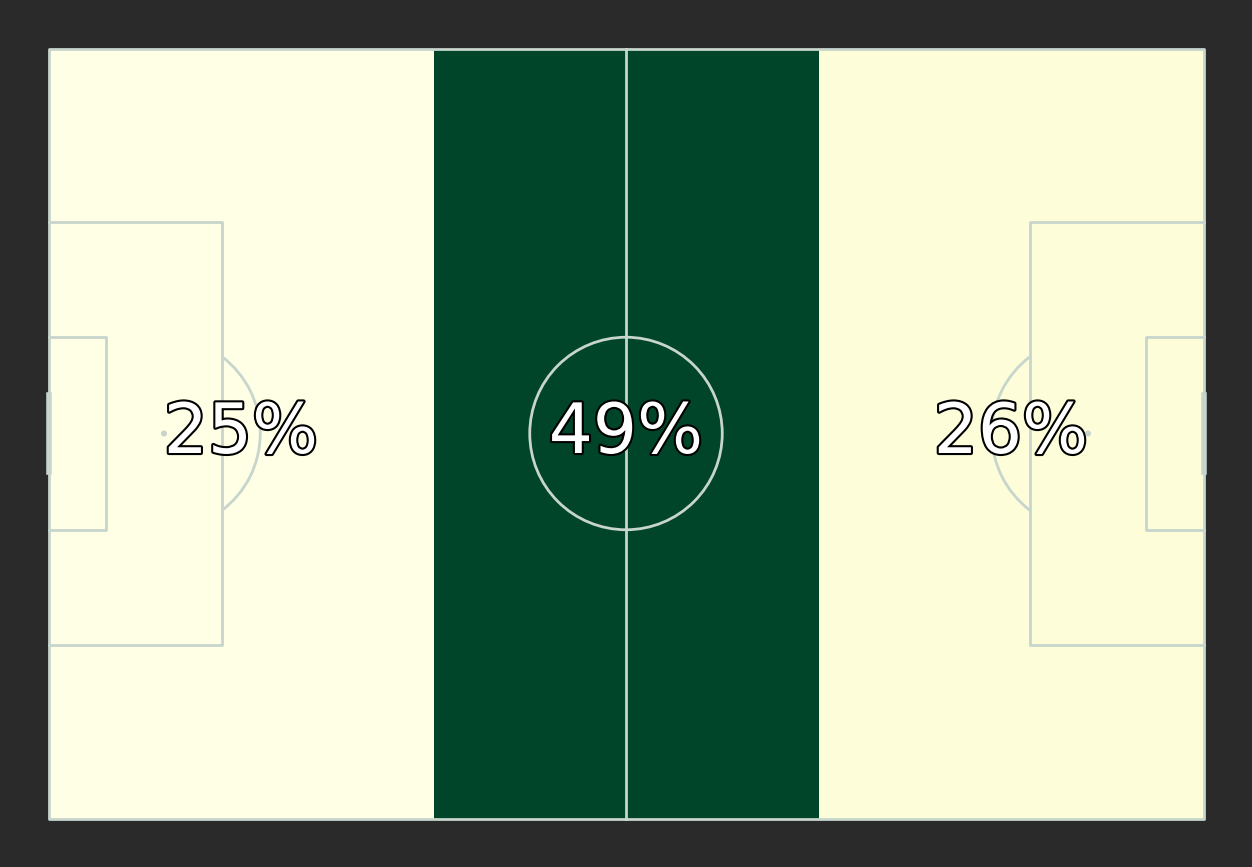

In [90]:
vmin = df_pass_perc[['Def 3rd (%)', 'Mid 3rd (%)', 'Att 3rd (%)']].values.min()
vmax = df_pass_perc[['Def 3rd (%)', 'Mid 3rd (%)', 'Att 3rd (%)']].values.max()

# setup a mplsoccer pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#2a2a2a', line_zorder=2, line_color='#c7d5cc')
bin_statistic = pitch.bin_statistic([0], [0], statistic='count', bins=(3, 1))

fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('#2a2a2a')

# path effects
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]


        
# fill in the bin statistics from df and plot the heatmap
bin_statistic['statistic'] = df_pass_perc[['Def 3rd (%)', 'Mid 3rd (%)', 'Att 3rd (%)']].values
heatmap = pitch.heatmap(bin_statistic, ax=ax, cmap='YlGn', vmin=vmin, vmax=vmax)
annotate = pitch.label_heatmap(bin_statistic, color='white', #fontproperties=fm.prop,
                               path_effects=path_eff, fontsize=50, ax=ax,
                               str_format='{0:.0f}%', ha='center', va='center')